In [1]:
import pandas as pd
import matplotlib.pyplot as plt

apple_data = pd.read_csv("AppleStore.csv")
original_count = apple_data["id"].count()

In [2]:
#lets exclude the apps that are too famous and successful as outliers, they are unreachable lol
#selecting data with rating counts under 600000
#for convenience size_bytes column were converted to megabytes
apple_data["size_bytes"] = apple_data["size_bytes"]/1000000
apple_data = apple_data[apple_data["size_bytes"]<2000]
apple_data = apple_data[apple_data["rating_count_tot"]<200000]
apple_data.sort_values("rating_count_tot",ascending=False).head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3747,4591,991153141,Fallout Shelter,1172.922368,USD,0.0,199396,1131,4.5,4.5,1.12,12+,Games,38,5,5,1
2942,3514,913292932,SimCity BuildIt,96.606208,USD,0.0,198338,2078,4.5,4.5,1.16.94,4+,Games,38,5,15,1
1780,2070,597855590,Real Basketball,70.336512,USD,0.0,198050,94315,4.5,4.5,1.9,4+,Games,43,5,1,1
197,225,328415391,Yahoo Fantasy Sports,131.000320,USD,0.0,190670,19,3.5,2.5,9.1.0,17+,Sports,37,3,45,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [7]:
#data only took off following datas, so they can be considered outliers
print(original_count)
print(apple_data["id"].count()-original_count)
print(1-apple_data["id"].count()/original_count)

7197
-156
0.021675698207586525


Text(0, 0.5, 'rating count')

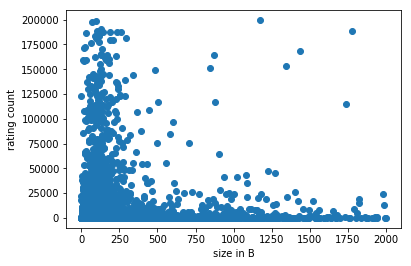

In [8]:
plt.scatter(apple_data["size_bytes"],apple_data["rating_count_tot"])
plt.xlabel("size in B")
plt.ylabel("rating count")
#looks like size of the app matters, app should be concise

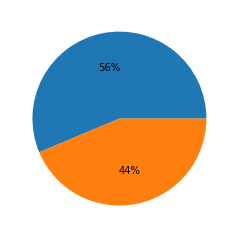

In [9]:
free_app = apple_data[apple_data["price"]==0]
paid_app = apple_data[apple_data["price"]>0]
plt.pie([free_app.id.count(),paid_app.id.count()]
        ,autopct='%1.0f%%');
#pie plot on free vs paid(#of apps), notice there is lot more portion of paid items compared to google.
#this can relate to fact that it is more strict to upload app on apple than to upload on android
#deleted the constraint to take in only apps under 10 dollars
#because there are different considerations to be in the market in the first place

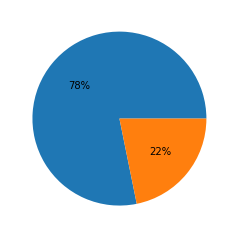

In [10]:
plt.pie([free_app.rating_count_tot.mean(),paid_app.rating_count_tot.mean()],autopct='%1.0f%%');
#shows that more people are using the free apps: duhh

In [11]:
#with above research, must proceed analysis on free and paid apps seperately
#Free apps

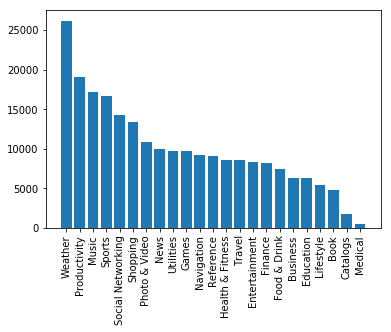

In [12]:
#lets compare genre and user counts(used count of ratings as indication of popularity, as install counts are used in google one)
df = free_app.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);

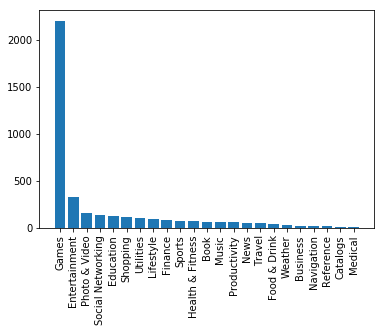

In [13]:
#this time with count of apps
df = free_app.groupby("prime_genre")["rating_count_tot"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);
#comparison between graph of mean and app counts of each genre shows that high average results from outliers
#lets dig in to games for it being dominate industry in the market

In [14]:
# apple_data.groupby("prime_genre").count()

In [15]:
#select only games
genre_data = apple_data[apple_data["prime_genre"]=="Games"]

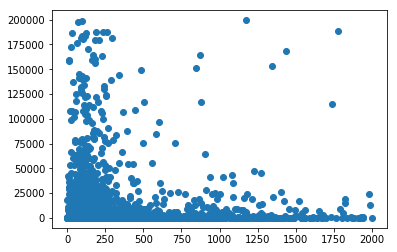

In [16]:
#how serious is the game? size of app was taken into consideration
plt.scatter(genre_data["size_bytes"],genre_data["rating_count_tot"])
#scatter plot analysis shows that games in between 0~500 megabytes are dominating
# question: how do you know the units of axis, they just set 50000000 as one unit of grid automatically

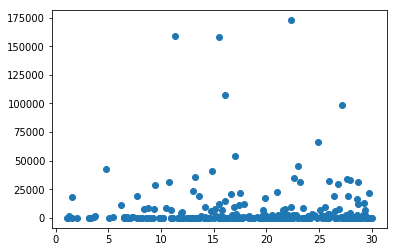

In [46]:
#lets dig deeper
genre_data_size = genre_data[genre_data["size_bytes"]<=30]
plt.scatter(genre_data_size["size_bytes"],genre_data_size["rating_count_tot"])

In [47]:
#lets take a look at paid apps as well, what kind of apps do people pay for?
#profit column was added by multiplying price and rating count
paid_app = apple_data[apple_data["price"]>0]
original_count = paid_app["id"].count()
paid_app["profit"] = paid_app["size_bytes"] * paid_app["rating_count_tot"]
paid_app.head()
#amongst the paid apps, another set of outliers were detected, lets take these out

C:\Users\tivme\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,profit
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,2.145983e+06
5,6,283619399,Shanghai Mahjong,10.485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,8.653859e+04
8,9,284666222,PCalc - The Best Calculator,49.250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,5.501259e+04
9,10,284736660,Ms. PAC-MAN,70.023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,5.521327e+05
10,11,284791396,Solitaire by MobilityWare,49.618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,3.806765e+06


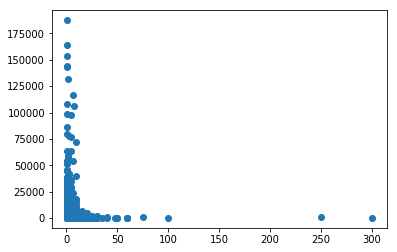

In [48]:
plt.scatter(paid_app["price"],paid_app["rating_count_tot"])
#looking at data below,
#select data with rating count below 100000 and price below $10

In [49]:
paid_app = paid_app[paid_app["rating_count_tot"]<100000]
paid_app = paid_app[paid_app["price"]<50]
print(original_count - paid_app["id"].count())

16


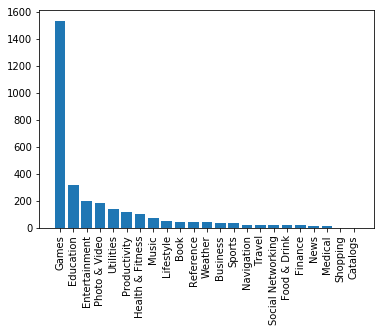

In [50]:
#genre vs profit
#how many of them for each gnere?
df = paid_app.groupby("prime_genre")["profit"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);
#again games..

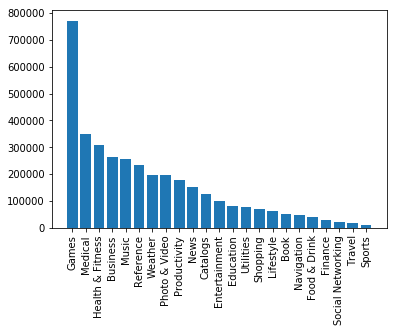

In [51]:
#average profit?
df = paid_app.groupby("prime_genre")["profit"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);

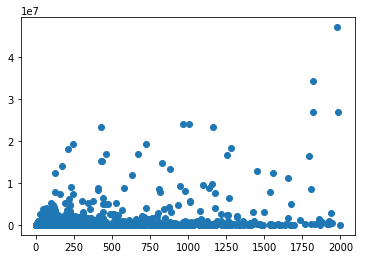

In [52]:
#let's focus on specific genre
genre_data = paid_app[paid_app["prime_genre"]=="Games"]
plt.scatter(genre_data["size_bytes"],genre_data["profit"])

In [269]:
#lets look at apps with small size(may be private ones?) are successful
df = paid_app[paid_app["size_bytes"]<100]
plt.scatter[df[]]

SyntaxError: invalid syntax (<ipython-input-269-65e6a0d3dc33>, line 3)